In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [3]:
band_gap = np.array([1.344, 1.424, 0.354, 3.68, 2.52, 1.751, 1.9, 2.28, 1.49])
effective_mass = np.array([0.0765, 0.067, 0.0239, 0.184, 0.14, 0.12, 0.11, 0.13, 0.09])

dic = {"effec": effective_mass, "band": band_gap}
df = pd.DataFrame(dic)
print(len(band_gap))
print(len(effective_mass))

df
df_sorted = df.sort_values(by="effec")
df_sorted = df_sorted.reset_index(drop=True)
effective_mass_new = np.array(df_sorted[["effec"][0]])
effective_mass_new
band_new = np.array(df_sorted[["band"][0]])
band_new
df_sorted

9
9


,effec,band
0,0.0239,0.354
1,0.0670,1.424
2,0.0765,1.344
3,0.0900,1.490
4,0.1100,1.900
5,0.1200,1.751
6,0.1300,2.280
7,0.1400,2.520
8,0.1840,3.680


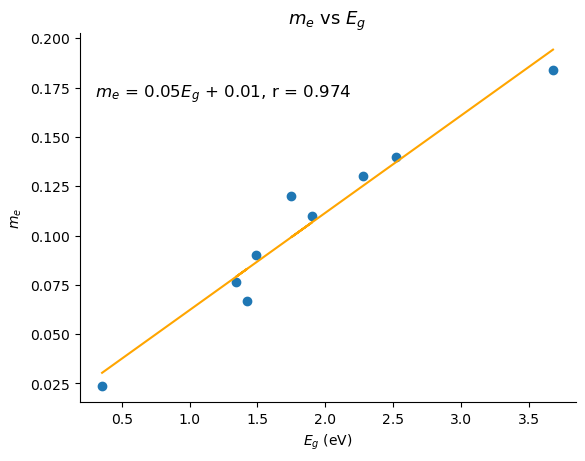

In [4]:
slope, intercept, r, p, std_err = stats.linregress(band_new, effective_mass_new)


plt.scatter(band_new, effective_mass_new)
plt.plot(band_new, slope*band_new + intercept, color="orange")
plt.gca().spines[["top", "right"]].set_visible(False)
plt.title(r"$m_e$ vs $E_g$", fontsize=13)
plt.xlabel(r"$E_g$ (eV)")
plt.ylabel(r"$m_e$")
text = r"$m_e$"
text2 = r"$E_g$"
plt.text(0.3, 0.17, f"{text} = {slope:.2f}{text2} + {intercept:.2f}, r = {r:.3}", fontsize=12)
plt.savefig("q1_ps3.png")
plt.show()

In [5]:
hbar = 6.582 * 10 ** -16
k = np.linspace(-1, 1, 100)
me = 9.109 * 10 ** -31
def conduction(bg, m, k):
    return bg + ((hbar ** 2) * (k ** 2)) / (2 * m * me)

def valence(bg, m, k):
    return bg - ((hbar ** 2) * (k ** 2)) / (2 * m * me)

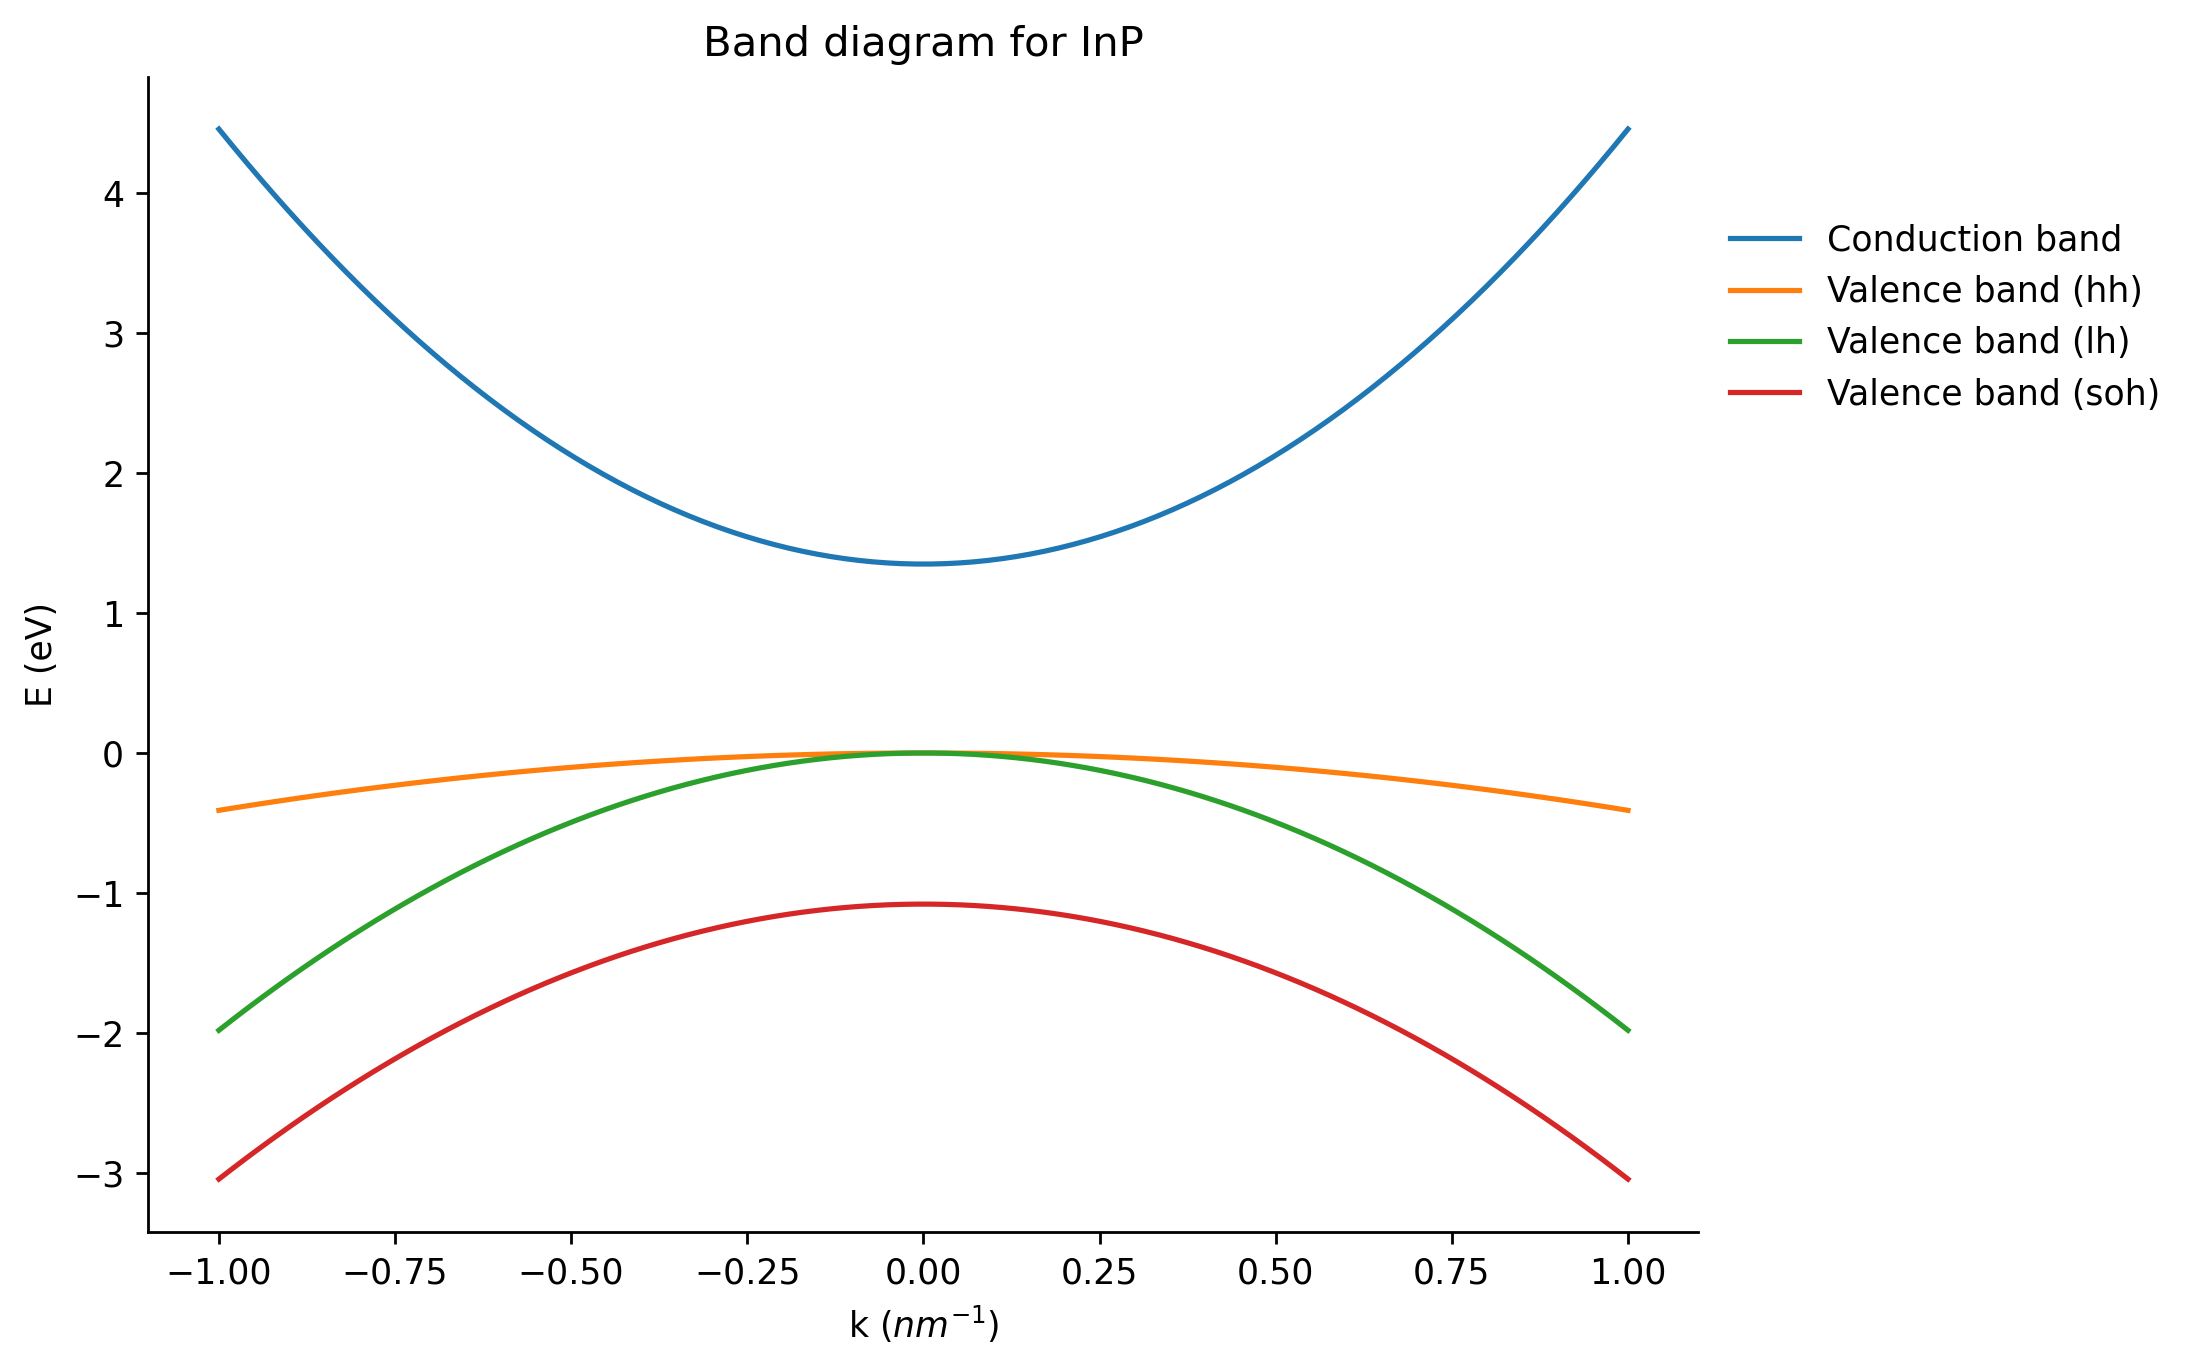

In [6]:
# InP
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(8, 6), dpi=250)
plt.plot(k, conduction(1.35, 0.0765, k), label="Conduction band")
plt.plot(k, valence(0, 0.58, k), label="Valence band (hh)")
plt.plot(k, valence(0, 0.12, k), label="Valence band (lh)")
plt.plot(k, valence(-1.08, 0.121, k), label="Valence band (soh)")
plt.gca().spines[["top", "right"]].set_visible(False)
plt.xlabel(r"k ($nm^{-1}$)")
plt.ylabel("E (eV)")
plt.title("Band diagram for InP")
plt.legend(frameon=False, bbox_to_anchor=(1, 0.9))
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
plt.savefig("inp.png")
plt.show()


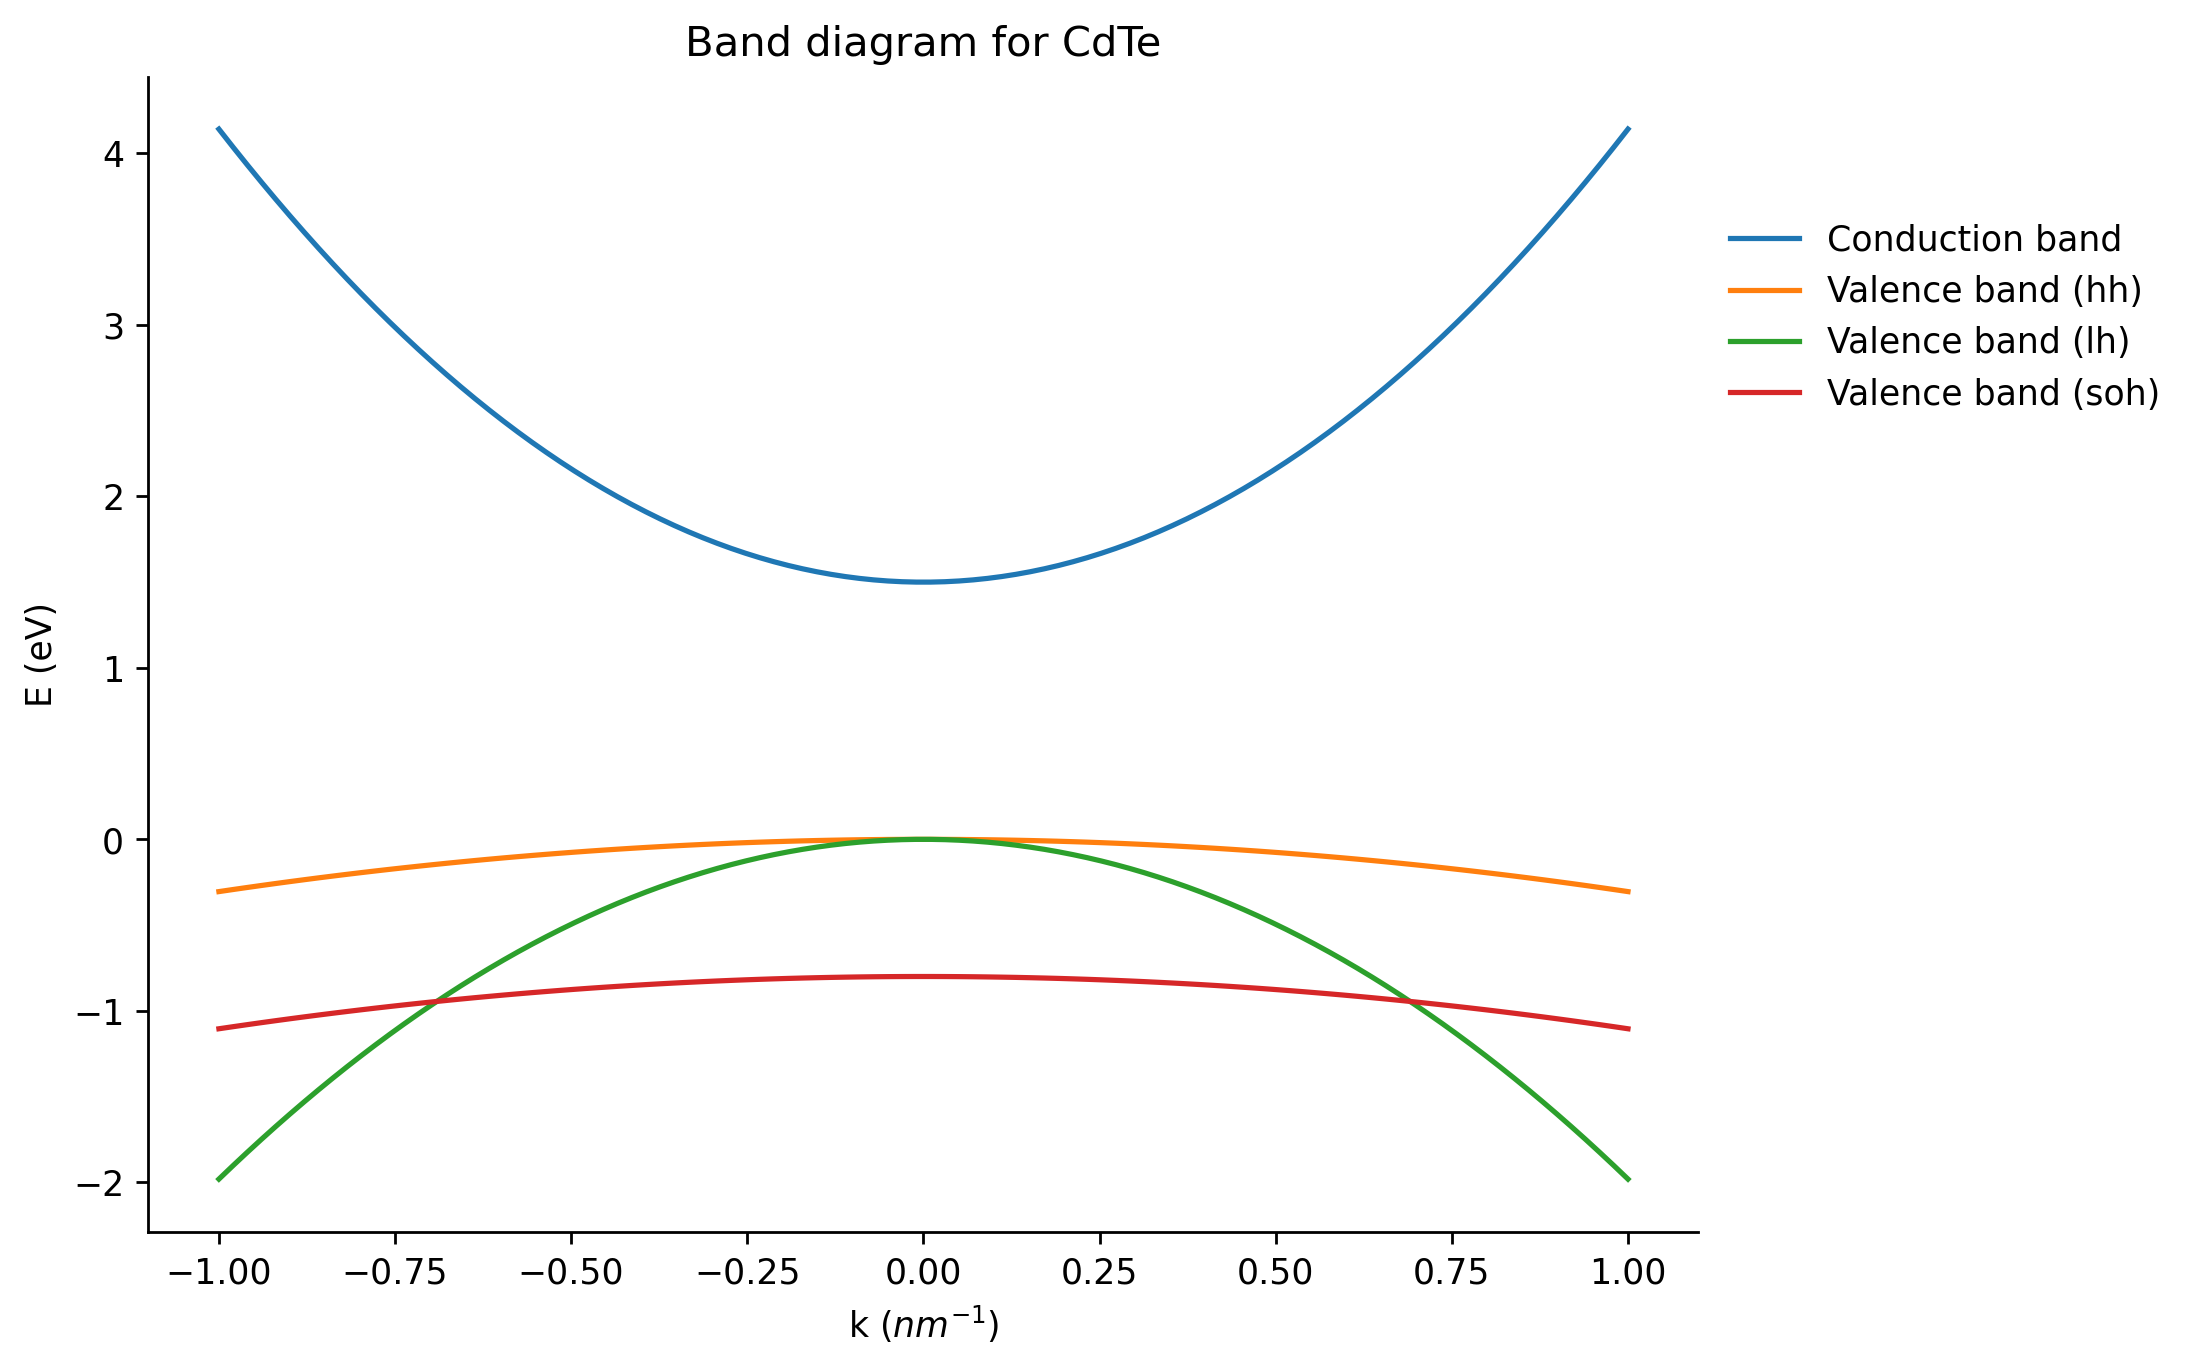

In [7]:
# CdTe

plt.figure(figsize=(8, 6), dpi=250)
plt.plot(k, conduction(1.5, 0.09, k), label="Conduction band")
plt.plot(k, valence(0, 0.78, k), label="Valence band (hh)")
plt.plot(k, valence(0, 0.12, k), label="Valence band (lh)")
plt.plot(k, valence(-0.8, 0.78, k), label="Valence band (soh)")
plt.gca().spines[["top", "right"]].set_visible(False)
plt.xlabel(r"k ($nm^{-1}$)")
plt.ylabel("E (eV)")
plt.title("Band diagram for CdTe")
plt.legend(frameon=False, bbox_to_anchor=(1, 0.9))
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
plt.savefig("cdte.png")
plt.show()

In [8]:
q = 1.602 * 10 ** -19
e0 = 8.854 * 10 ** -12
h = 6.62 * 10 ** -34
me = 9.109 * 10 ** -31

def reduced_mass(melec, mh):
    return ((melec * mh) / (melec + mh)) * me 

def binding_energy(rm, dc):
    return (6.242 * 10 ** 21) * (rm * (q ** 4)) / (8 * (e0 ** 2) * (dc ** 2) * ((6.62 * 10 ** -34) ** 2))

def bohr_radius(rm, dc):
    return 10 ** 10 * (e0 * dc * (h ** 2) / (np.pi * rm * (q ** 2)))

In [9]:
insb_hh = binding_energy(reduced_mass(0.01359, 0.4), 16.8)
print(insb_hh)

insb_lh = binding_energy(reduced_mass(0.01359, 0.0158), 16.8)
print(insb_lh)

insb_br_hh = bohr_radius(reduced_mass(0.01359, 0.4), 16.8)
print(insb_br_hh)

insb_br_lh = bohr_radius(reduced_mass(0.01359, 0.0158), 16.8)
print(insb_br_lh)

0.6345273807305634
0.35271010840952605
675.3202328320548
1214.904728490919


In [10]:
cdte_hh = binding_energy(reduced_mass(0.09, 0.78), 10.3)
print(cdte_hh)

cdte_lh = binding_energy(reduced_mass(0.09, 0.12), 10.3)
print(cdte_lh)

cdte_br_hh = bohr_radius(reduced_mass(0.09, 0.78), 10.3)
print(cdte_br_hh)

cdte_br_lh = bohr_radius(reduced_mass(0.09, 0.12), 10.3)
print(cdte_br_lh)

10.36341577886985
6.605254012906061
67.44181715941535
105.81388554322065


In [11]:
cdse_hh = binding_energy(reduced_mass(0.11, 0.44), 12.93)
print(cdse_hh)

cdse_br_hh = bohr_radius(reduced_mass(0.11, 0.44), 12.93)
print(cdse_br_hh)

7.172080155783433
77.62931446642659


In [12]:
cds_hh = binding_energy(0.197 * me, 9.78)
print(cds_hh)

cds_br_hh = bohr_radius(0.197 * me, 9.78)
print(cds_br_hh)

28.06390030100034
26.229047939661577


In [13]:
zns_hh = binding_energy(reduced_mass(0.8, 0.24), 8.1)
print(zns_hh)

zns_br_hh = bohr_radius(reduced_mass(0.8, 0.24), 8.1)
print(zns_br_hh)

38.34046395057372
23.180725688698605


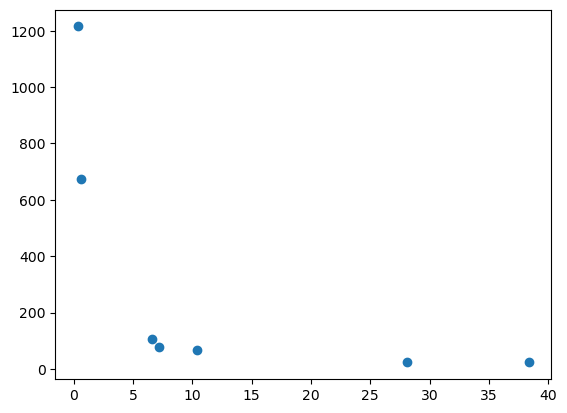

In [15]:
overall_binding = np.array([0.35271010840952605, 0.6345273807305634, 6.605254012906061, 7.172080155783433, 10.36341577886985, 28.06390030100034, 38.34046395057372])
overall_size = np.array([1214.904728490919, 675.3202328320548, 105.81388554322065, 77.62931446642659, 67.44181715941535, 26.229047939661577, 23.180725688698605])

plt.scatter(overall_binding, overall_size)
# a, b, c = np.polyfit(overall_binding, overall_size, 2)
# plt.plot(overall_binding, a * overall_size ** 2 + b * overall_size + c)